In [54]:
import pandas as pd
logs = pd.read_csv('Dataset/updated_train.csv')

In [55]:

from sklearn.utils import resample

# Assuming 'user_logs' is your dataset and 'label' is the target column
print("Values:")
print(logs['label'].value_counts())

Values:
0    339
1     62
Name: label, dtype: int64


In [56]:
# Fisher Score Threshold 10
# logs = logs.drop(['item_id', 'cat_affinity', 'time_stamp' , 'cat_id', 'click_to_purchase_ratio', 'average_order_value', 'promo_engagement', 'pages_viewed', 'days_since_first_interaction', 'days_since_last_interaction', 'unique_users', 'add_to_cart_to_purchase_ratio', 'clicks'], axis=1)

# Random Forest Highest Scores 0.2
logs = logs.drop(['1', 'add_to_cart', '2', 'day_of_week', 'purchases', 'gender', 'average_order_value', '3', 'action_type', 'time_stamp'], axis=1)

In [57]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = logs.drop(['label'], axis=1)
y = logs['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the minority class and undersample the majority class
over = SMOTE(sampling_strategy=0.5)

# Convert all column names to string data type
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Create a pipeline to combine both sampling techniques
pipeline = Pipeline(steps=[('o', over)])
X_train, y_train= pipeline.fit_resample(X_train, y_train)

In [58]:
label_distribution = pd.Series(y_train).value_counts()
print(label_distribution)

0    269
1    134
Name: label, dtype: int64


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np

# Replace missing values with the mean of the respective column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA for feature selection
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix

# Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_pca, y_train)

# Predict the class labels for the test data using the trained classifier
y_pred = nb_classifier.predict(X_test_pca)

# Calculate the evaluation metrics of the classifier
gauss_accuracy = accuracy_score(y_test, y_pred)
gauss_f1 = f1_score(y_test, y_pred, average='weighted')
gauss_precision = precision_score(y_test, y_pred, average='weighted')
gauss_recall = recall_score(y_test, y_pred, average='weighted')
gauss_roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovo')

# Print the evaluation metrics of the classifier
print("Gaussian Accuracy:", gauss_accuracy)
print("Gaussian F1 score:", gauss_f1)
print("Gaussian Precision:", gauss_precision)
print("Gaussian Recall:", gauss_recall)
print("Gaussian ROC-AUC score:", gauss_roc_auc)

Gaussian Accuracy: 0.8024691358024691
Gaussian F1 score: 0.8192108241859484
Gaussian Precision: 0.8446123819898329
Gaussian Recall: 0.8024691358024691
Gaussian ROC-AUC score: 0.6941558441558441


In [61]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier using maximum likelihood estimation
lr_classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
lr_classifier.fit(X_train_pca, y_train)

# Predict the class labels for the test data using the trained classifier
y_pred = lr_classifier.predict(X_test_pca)

# Calculate the evaluation metrics of the classifier
log_accuracy = accuracy_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred, average='weighted')
log_precision = precision_score(y_test, y_pred, average='weighted')
log_recall = recall_score(y_test, y_pred, average='weighted')
log_roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovo')

# Print the evaluation metrics of the classifier
print("Log Accuracy:", log_accuracy)
print("Log F1 score:", log_f1)
print("Log Precision:", log_precision)
print("Log Recall:", log_recall)
print("Log ROC-AUC score:", log_roc_auc)

Log Accuracy: 0.8271604938271605
Log F1 score: 0.8379140830121221
Log Precision: 0.8530490086045641
Log Recall: 0.8271604938271605
Log ROC-AUC score: 0.7084415584415584


In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Train a Linear Discriminant Analysis classifier on the training set
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_pca, y_train)

# Predict the class labels for the test data using the trained classifier
y_pred = lda_classifier.predict(X_test_pca)

# Calculate the evaluation metrics of the classifier
ldf_accuracy = accuracy_score(y_test, y_pred)
ldf_f1 = f1_score(y_test, y_pred, average='weighted')
ldf_precision = precision_score(y_test, y_pred, average='weighted')
ldf_recall = recall_score(y_test, y_pred, average='weighted')
ldf_roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovo')

# Print the evaluation metrics of the classifier
print("LDF Accuracy:", ldf_accuracy)
print("LDF F1 score:", ldf_f1)
print("LDF Precision:", ldf_precision)
print("LDF Recall:", ldf_recall)
print("LDF ROC-AUC score:", ldf_roc_auc)

LDF Accuracy: 0.8148148148148148
LDF F1 score: 0.8285322359396434
LDF Precision: 0.8486467236467237
LDF Recall: 0.8148148148148148
LDF ROC-AUC score: 0.7012987012987013


Best parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
ROC Curve
Confusion Matrix


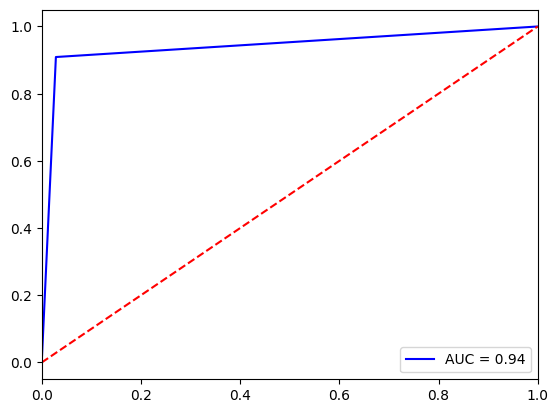

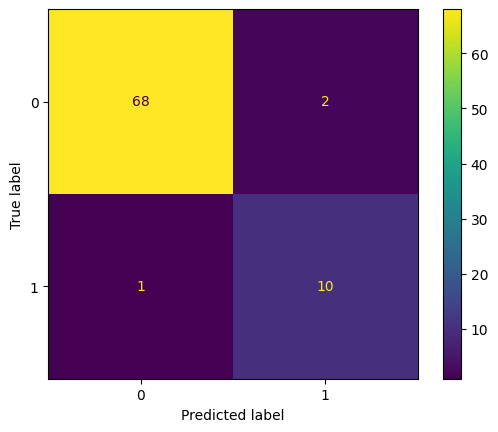

KNN Accuracy: 0.9629629629629629
KNN F1 score: 0.8695652173913043
KNN Precision: 0.8333333333333334
KNN Recall: 0.9090909090909091
KNN ROC-AUC score: 0.9402597402597402


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import matplotlib.pyplot as mp

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': [10, 20, 30],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'metric': ['cityblock', 'euclidean', 'manhattan', 'l1', 'l2']
}

grid_search = GridSearchCV(knn, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_pca, y_train)

best_knn = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict the class labels for the test data using the trained classifier
y_pred = best_knn.predict(X_test_pca)

# Calculate the evaluation metrics of the classifier
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_roc_auc = roc_auc_score(y_test, y_pred)

print("ROC Curve")
fpr, tpr, threshold = roc_curve(y_test, y_pred)
mp.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % knn_roc_auc)
mp.legend(loc = 'lower right')
mp.plot([0,1],[0,1],'r--')
mp.xlim([0,1])

print("Confusion Matrix")
conf = confusion_matrix(y_test, y_pred, labels=best_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=best_knn.classes_)
disp.plot()
mp.show()

# Print the evaluation metrics of the classifier
print("KNN Accuracy:", knn_accuracy)
print("KNN F1 score:", knn_f1)
print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)
print("KNN ROC-AUC score:", knn_roc_auc)

In [64]:
#Parzen window technique
from scipy.stats import kde

if not isinstance(X_train_pca, pd.DataFrame):
    X_train_pca = pd.DataFrame(X_train_pca, columns=X_train_pca.dtype.names)

df_train = X_train_pca.assign(label=y_train)
df_train_cols = df_train.shape[1]-1

df_class0_kde = kde.gaussian_kde(df_train[df_train["label"]==0].T[0:df_train_cols], bw_method='scott')
df_class1_kde = kde.gaussian_kde(df_train[df_train["label"]==1].T[0:df_train_cols], bw_method='scott')


C:\Users\seanl\AppData\Local\Temp\ipykernel_16344\3564177157.py:10: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  df_class0_kde = kde.gaussian_kde(df_train[df_train["label"]==0].T[0:df_train_cols], bw_method='scott')
C:\Users\seanl\AppData\Local\Temp\ipykernel_16344\3564177157.py:11: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  df_class1_kde = kde.gaussian_kde(df_train[df_train["label"]==1].T[0:df_train_cols], bw_method='scott')


In [65]:
def classifier_eval(X, y_true, classifier_func, classifier_func_args):
    """
    Keyword arguments:
        X: 'n x (d-1)'- dimensional numpy array, with all X data.
        y_true: 'n x 1'- dimensional numpy array of class label for X data.
        classifier_func: Function that returns the max argument from the discriminant function.
            evaluation and the class label as a tuple.
        classifier_func_args: List of arguments for the 'classifier_func'.
    
    Returns a tuple, consisting of the accuracy, F1 score, precision, recall, and ROC curve.
    """
    y_pred = []
    for row in X:
        g = classifier_func(row, *classifier_func_args)
        y_pred.append(g[1])
    
    #Calculate evaluation metrics of the classifier
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovo')
    
    return (accuracy, f1, precision, recall, roc_auc)

In [66]:
import operator

def bayes_classifier(x_vec, kdes):
    """
    Classifies an input sample into class w_j determined by
    maximizing the class conditional probability for p(x|w_j).

    Keyword arguments:
        x_vec: A dx1 dimensional numpy array representing the sample.
        kdes: List of the gausssian_kde (kernel density) estimates

    Returns a tuple ( p(x|w_j)_value, class label ).

    """
    p_vals = []
    for kde in kdes:
        p_vals.append(kde.evaluate(x_vec))
    max_index, max_value = max(enumerate(p_vals), key=operator.itemgetter(1))
    return (max_value, max_index)

In [67]:
if not isinstance(X_test_pca, np.ndarray):
    X_test_pca = X_test_pca.to_numpy()
pw_accuracy, pw_f1, pw_precision, pw_recall, pw_roc_auc = classifier_eval(X_test_pca, \
    y_test, bayes_classifier, [[df_class0_kde, df_class1_kde]])

#print("df class dict:        ", df_class_dict)
#print("df error:             ", df_err)
print("Parzen Window Accuracy:      ", pw_accuracy)
print("Parzen Window F1 score:      ", pw_f1)
print("Parzen Window Precision:     ", pw_precision)
print("Parzen Window Recall:        ", pw_recall)
print("Parzen Window ROC-AUC Score: ", pw_roc_auc)

Parzen Window Accuracy:       0.9135802469135802
Parzen Window F1 score:       0.9178192304226368
Parzen Window Precision:      0.9257021769459581
Parzen Window Recall:         0.9135802469135802
Parzen Window ROC-AUC Score:  0.8733766233766235


In [68]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Replace these with the best parameters obtained from GridSearchCV
best_params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'gamma': 0
}

# Create an XGBoost classifier with the best parameters
xgb_classifier = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    **best_params
)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Predict the class labels for the test data using the trained classifier
y_pred = xgb_classifier.predict(X_test)

# Calculate the evaluation metrics of the classifier
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics of the classifier
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost F1 score:", xgb_f1)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost ROC-AUC score:", xgb_roc_auc)

XGBoost Accuracy: 0.9382716049382716
XGBoost F1 score: 0.761904761904762
XGBoost Precision: 0.8
XGBoost Recall: 0.7272727272727273
XGBoost ROC-AUC score: 0.8493506493506493


In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, min_lr=0.1)

# Train the model
history = model.fit(X_train_pca, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping, model_checkpoint, reduce_lr_on_plateau])

# Evaluate the model on the test set
_, test_accuracy = model.evaluate(X_test_pca, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Get the predicted probabilities
y_pred_probs = model.predict(X_test_pca)

# Convert probabilities to class labels
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Calculate the evaluation metrics of the classifier
nn_accuracy = accuracy_score(y_test, y_pred)
nn_f1 = f1_score(y_test, y_pred)
nn_precision = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_roc_auc = roc_auc_score(y_test, y_pred_probs)

# Print the evaluation metrics of the classifier
print("Neural Network Accuracy:", nn_accuracy)
print("Neural Network F1 score:", nn_f1)
print("Neural Network Precision:", nn_precision)
print("Neural Network Recall:", nn_recall)
print("Neural Network ROC-AUC score:", nn_roc_auc)

Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 0.5507 - accuracy: 0.7671 - val_loss: 1.6950 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 0.3908 - accuracy: 0.8323 - val_loss: 1.1160 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.3566 - accuracy: 0.8416 - val_loss: 1.2212 - val_accuracy: 0.0247 - lr: 0.0100
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.3093 - accuracy: 0.8665 - val_loss: 0.8553 - val_accuracy: 0.4198 - lr: 0.0100
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2662 - accuracy: 0.8913 - val_loss: 0.9660 - val_accuracy: 0.3951 - lr: 0.0100
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.2481 - accuracy: 0.8913 - val_loss: 0.7028 - val_accuracy: 0.6420 - lr: 0.0100
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - 

Epoch 54/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0611 - accuracy: 0.9783 - val_loss: 0.2054 - val_accuracy: 0.8642 - lr: 0.0100
Epoch 55/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0566 - accuracy: 0.9689 - val_loss: 0.1828 - val_accuracy: 0.8642 - lr: 0.0100
Epoch 56/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.9814 - val_loss: 0.2083 - val_accuracy: 0.8642 - lr: 0.0100
Epoch 57/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0418 - accuracy: 0.9876 - val_loss: 0.2198 - val_accuracy: 0.8642 - lr: 0.0100
Epoch 58/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0403 - accuracy: 0.9783 - val_loss: 0.1790 - val_accuracy: 0.8642 - lr: 0.0100
Epoch 59/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.1741 - val_accuracy: 0.8642 - lr: 0.0100
Epoch 60/100
11/11 [==============================] - 0s 6ms/step - lo

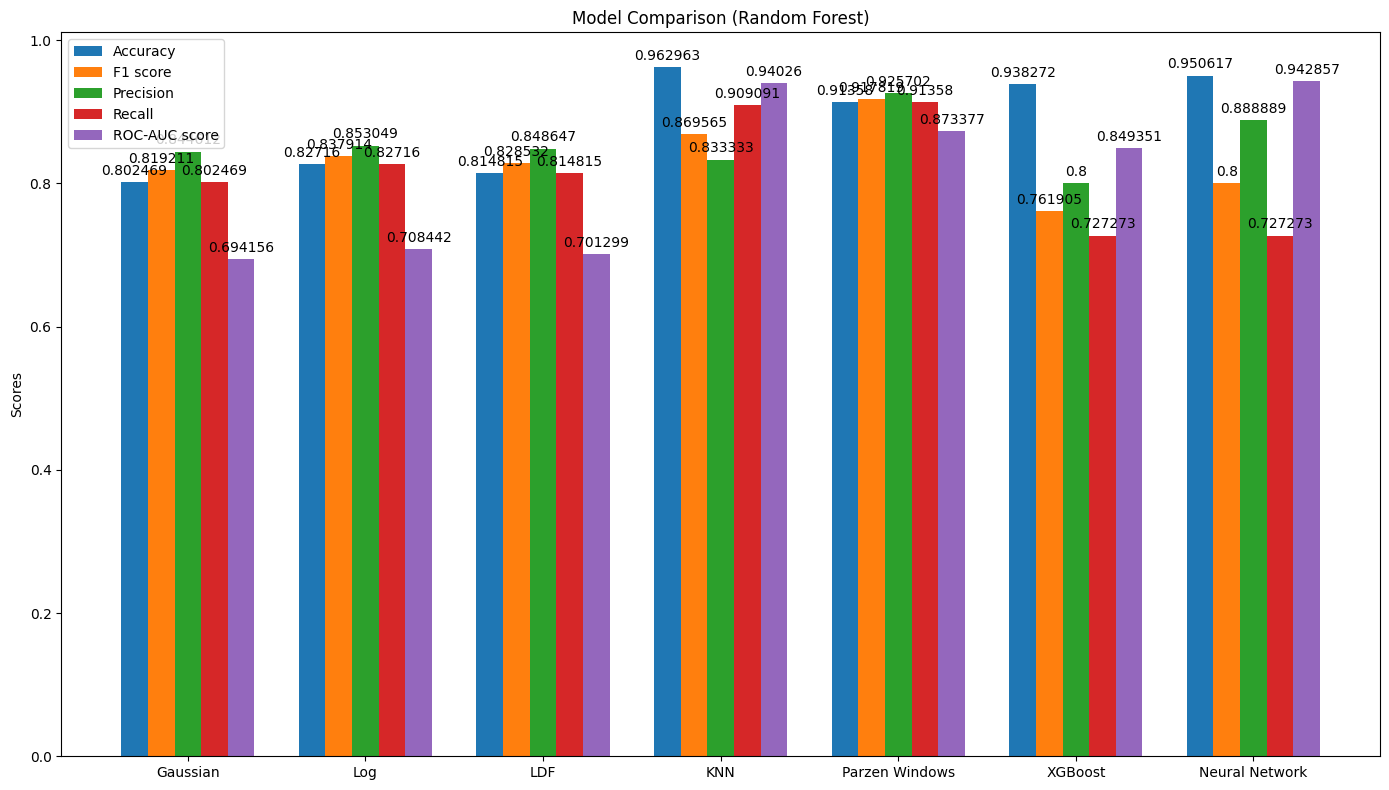

In [70]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Gaussian', 'Log', 'LDF', 'KNN', 'Parzen Windows', 'XGBoost', 'Neural Network']
accuracy = [gauss_accuracy, log_accuracy, ldf_accuracy, knn_accuracy, pw_accuracy, xgb_accuracy, nn_accuracy]
f1_scores = [gauss_f1, log_f1, ldf_f1, knn_f1, pw_f1, xgb_f1, nn_f1]
precision = [gauss_precision, log_precision, ldf_precision, knn_precision, pw_precision, xgb_precision, nn_precision]
recall = [gauss_recall, log_recall, ldf_recall, knn_recall, pw_recall, xgb_recall, nn_recall]
roc_auc = [gauss_roc_auc, log_roc_auc, ldf_roc_auc, knn_roc_auc, pw_roc_auc, xgb_roc_auc, nn_roc_auc]

x = np.arange(len(models))  
width = 0.15

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - 2 * width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width, f1_scores, width, label='F1 score')
rects3 = ax.bar(x, precision, width, label='Precision')
rects4 = ax.bar(x + width, recall, width, label='Recall')
rects5 = ax.bar(x + 2 * width, roc_auc, width, label='ROC-AUC score')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison (Random Forest)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
ax.bar_label(rects5, padding=3)

fig.tight_layout()

plt.show()